In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import scipy.stats as stats #for qq plot

import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day31-power-transformer/concrete_data.csv")
df.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
605,236.0,0.0,0.0,194.0,0.0,968.0,885.0,3,6.47
800,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,7,13.71
29,475.0,0.0,0.0,228.0,0.0,932.0,594.0,7,38.60
562,382.5,0.0,0.0,185.7,0.0,1047.8,739.3,7,24.07
816,525.0,0.0,0.0,189.0,0.0,1125.0,613.0,7,42.42


In [5]:
df.shape

(1030, 9)

In [6]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [7]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
x = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## 1

In [11]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
y_pred = lr.predict(x_test)

In [14]:
r2_score(y_test,y_pred)

0.627553179231485

##  2

In [15]:
lr = LinearRegression()
np.mean(cross_val_score(lr,x,y,scoring='r2'))

0.4609940491662866

##  distplots

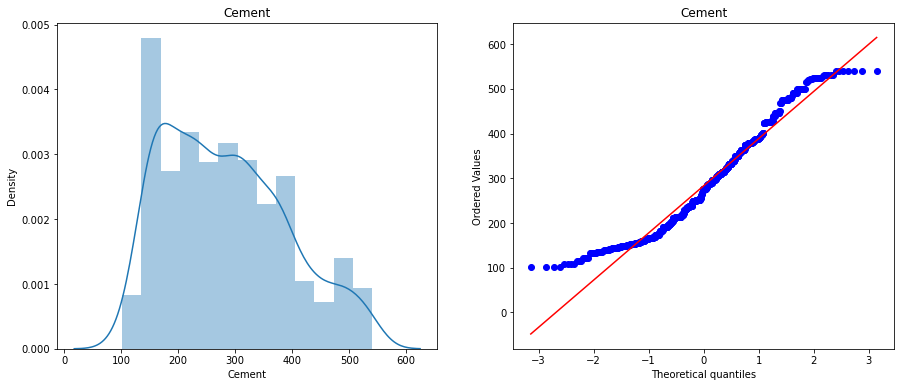

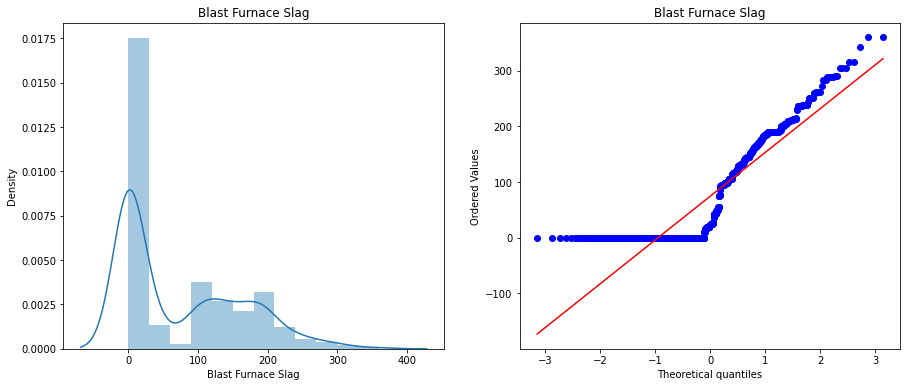

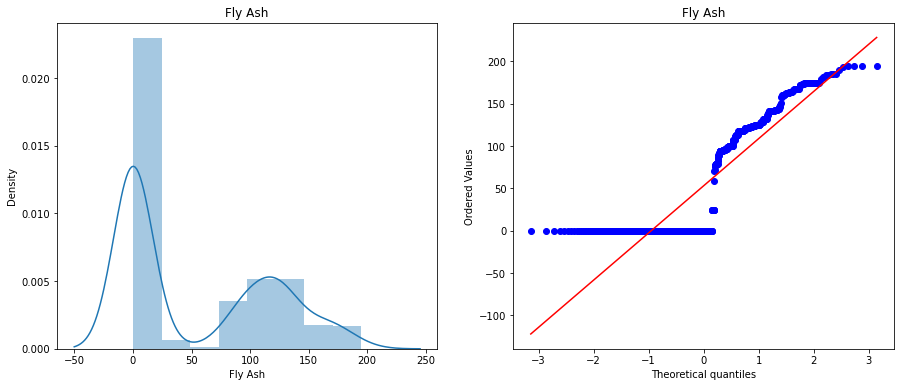

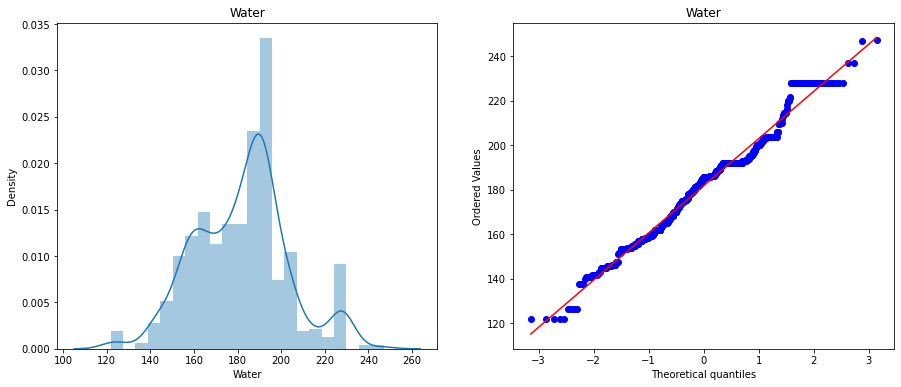

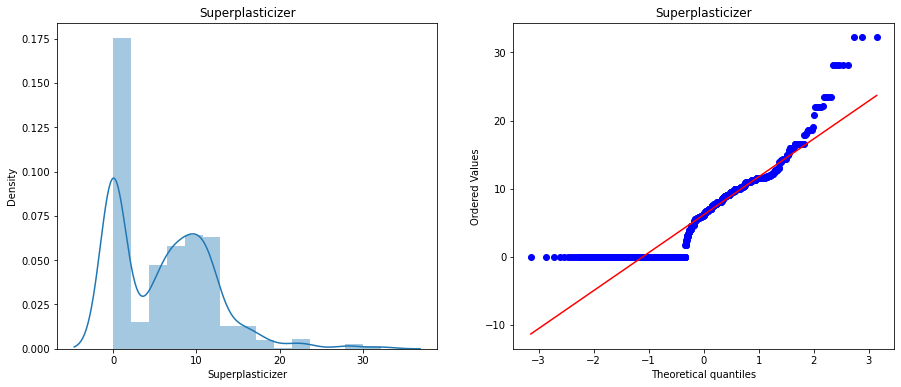

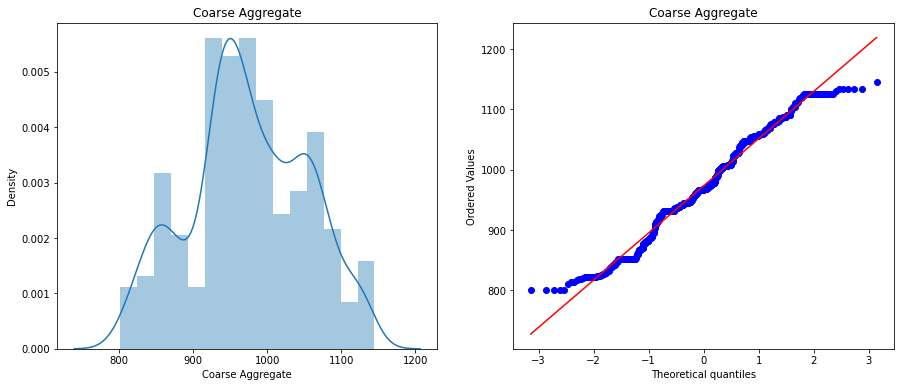

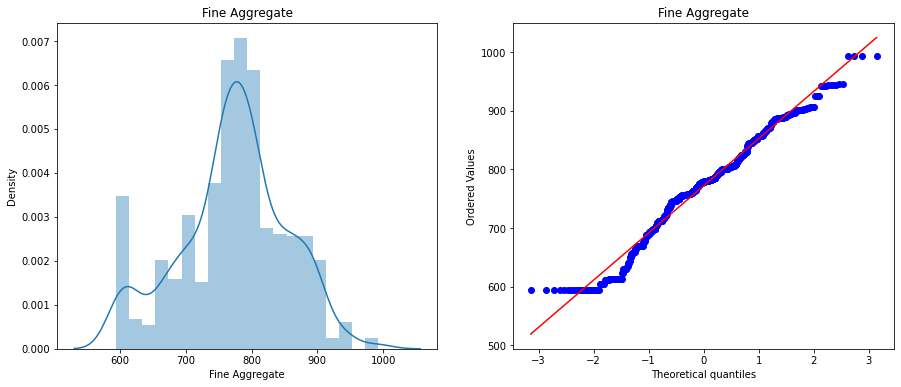

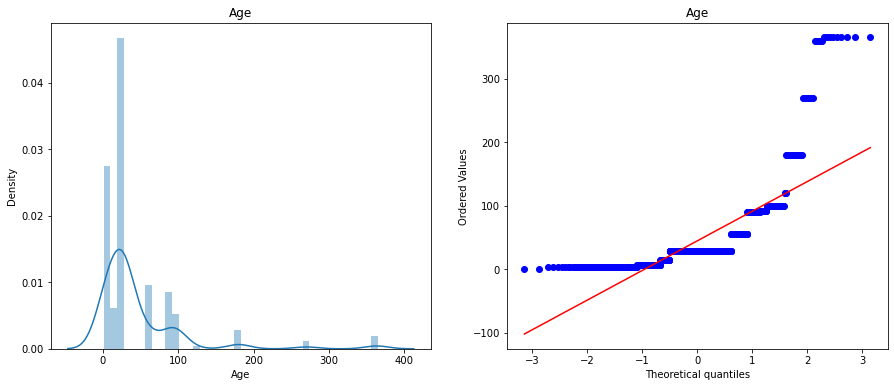

In [19]:
for col in x_train.columns:
    plt.figure(figsize=(15,6))
    
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(x_train[col],dist="norm",plot=plt)
    plt.title(col)
    
    plt.show()

##  BOX-COX

In [20]:
pt = PowerTransformer(method='box-cox')


x_train_transformed = pt.fit_transform(x_train+0.000001)
x_test_transformed = pt.fit_transform(x_test+0.000001)

pd.DataFrame({'cols':x_train.columns,'box-cox_lambdas':pt.lambdas_})

,cols,box-cox_lambdas
0,Cement,0.215602
1,Blast Furnace Slag,0.025996
2,Fly Ash,-0.006544
3,Water,0.959062
4,Superplasticizer,0.103365
5,Coarse Aggregate,1.192492
6,Fine Aggregate,1.973781
7,Age,-0.014692


In [21]:
lr = LinearRegression()
lr.fit(x_train_transformed,y_train)

y_pred2 = lr.predict(x_test_transformed)

r2_score(y_test,y_pred2)

0.8055321005305189

## BOX-COX CROSS VALIDATION

In [22]:
pt = PowerTransformer(method='box-cox')
x_transformed = pt.fit_transform(x+0.000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,x_transformed,y,scoring='r2'))

0.6662950327869241

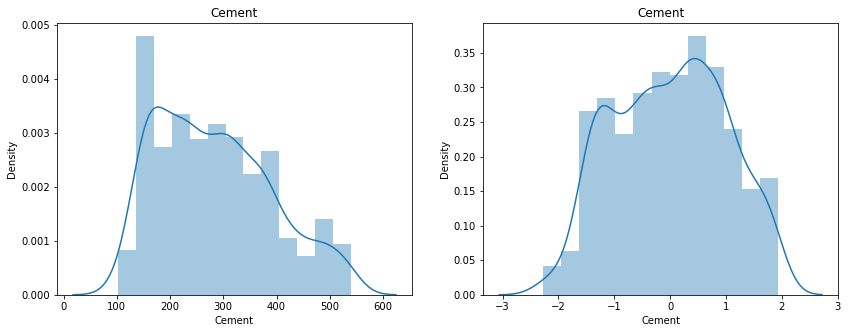

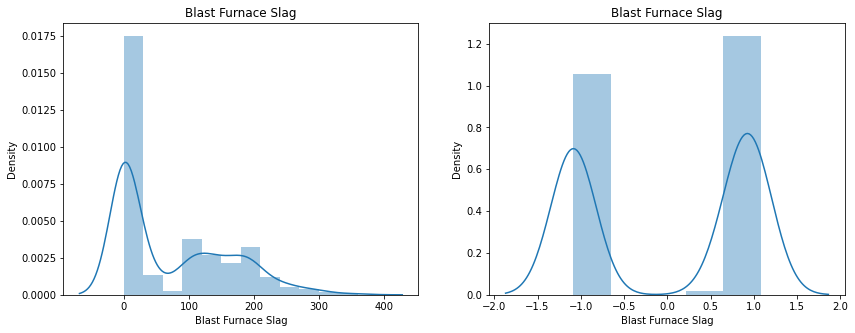

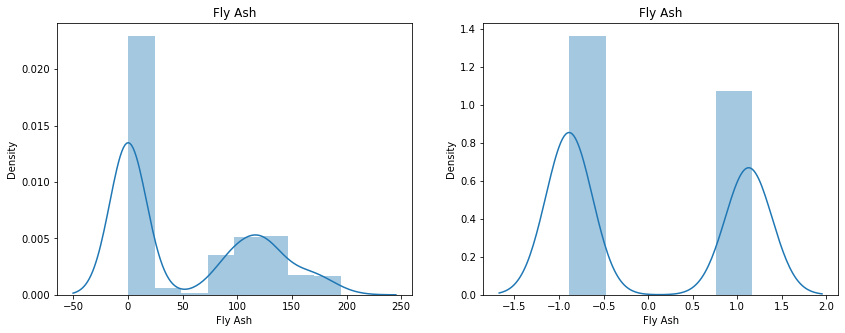

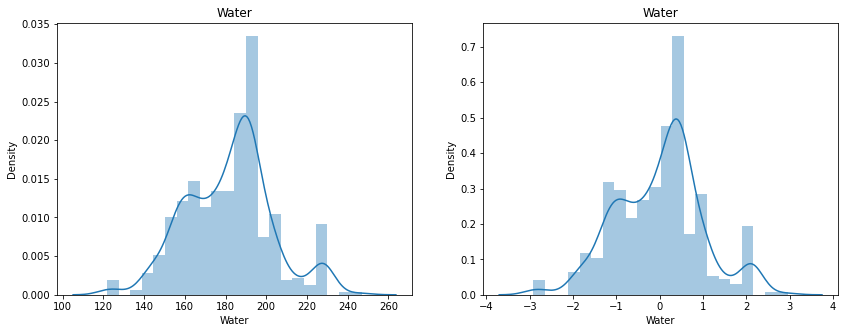

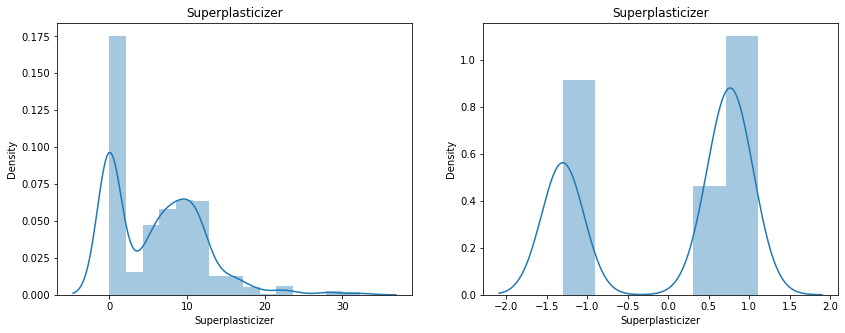

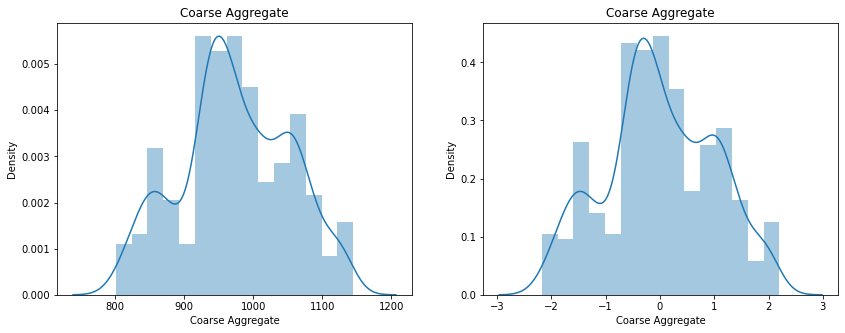

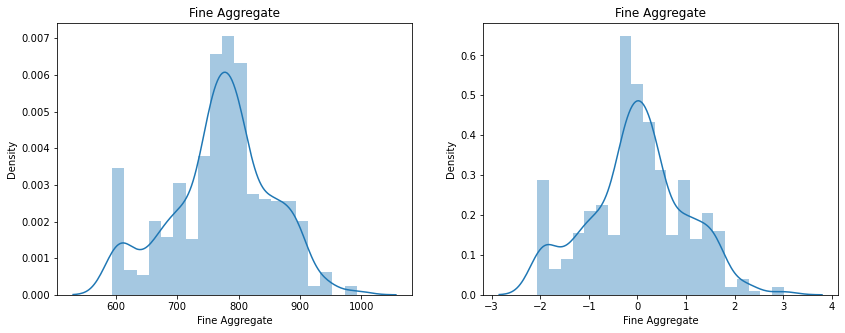

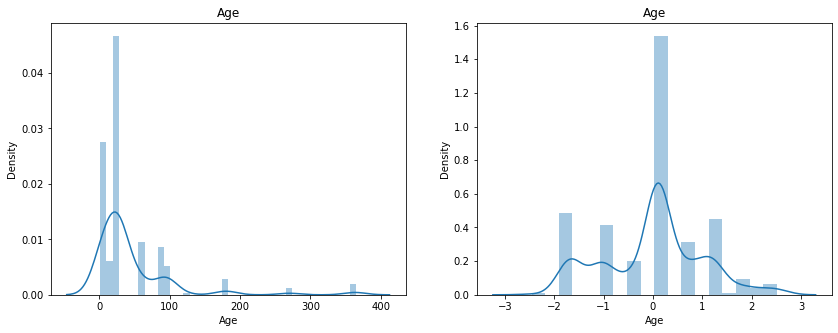

In [26]:
#before and after comparision of box-cox plot
x_train_transformed = pd.DataFrame(x_train_transformed,columns=x_train.columns)


for col in x_train_transformed.columns:
    plt.figure(figsize=(14,5))
    
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)
    
    plt.subplot(122)
    sns.distplot(x_train_transformed[col])
    plt.title(col)
    
    plt.show()

## YEO-JOHNSON

In [28]:
pt1 = PowerTransformer()

x_train_transformed2 = pt1.fit_transform(x_train)
x_test_transformed2 = pt1.fit_transform(x_test)
                                        
lr = LinearRegression()
lr.fit(x_train_transformed2,y_train)

y_pred3 = lr.predict(x_test_transformed2)
                                        
r2_score(y_test,y_pred3)

0.8153845515001846

In [30]:
pd.DataFrame({'cols':x_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,Yeo_Johnson_lambdas
0,Cement,0.213025
1,Blast Furnace Slag,0.020476
2,Fly Ash,-0.038218
3,Water,0.958936
4,Superplasticizer,0.304951
5,Coarse Aggregate,1.192751
6,Fine Aggregate,1.975085
7,Age,-0.062443


## YEO-JOHNSON CROSS VALIDATION

In [31]:

pt = PowerTransformer()
x_transformed2 = pt.fit_transform(x)

lr = LinearRegression()
np.mean(cross_val_score(lr,x_transformed2,y,scoring='r2'))


0.6834625134285743

In [34]:
x_train_transformed2 = pd.DataFrame(x_train_transformed2,columns=x_train.columns)

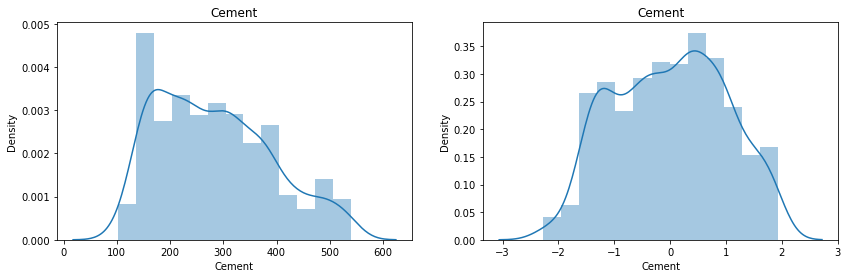

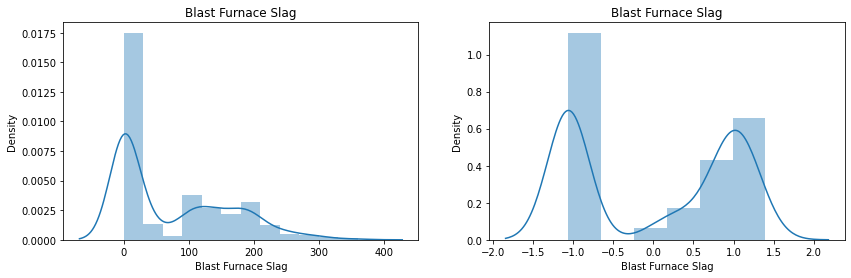

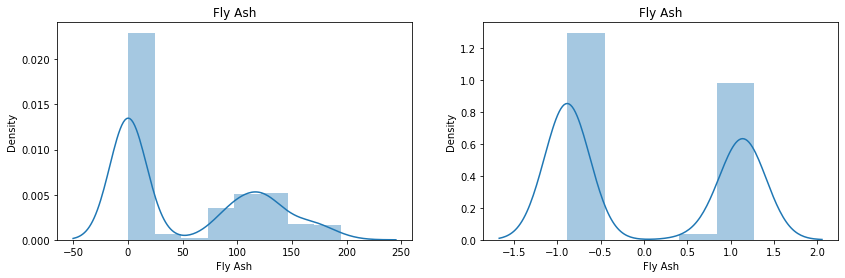

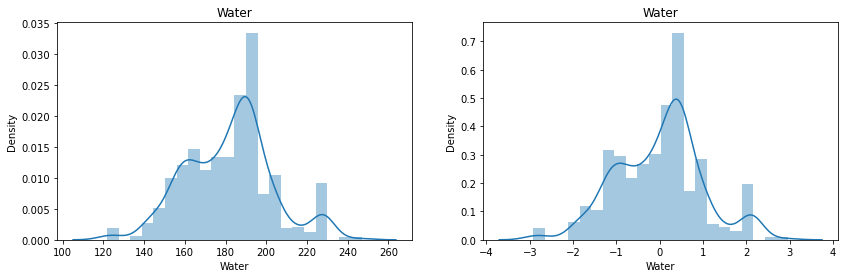

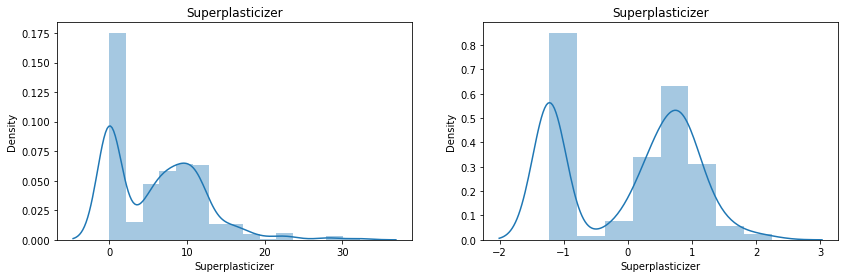

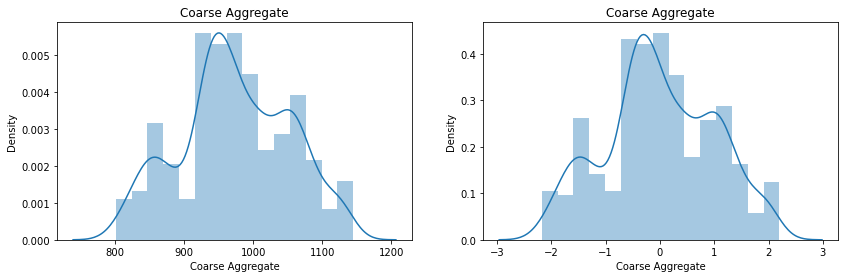

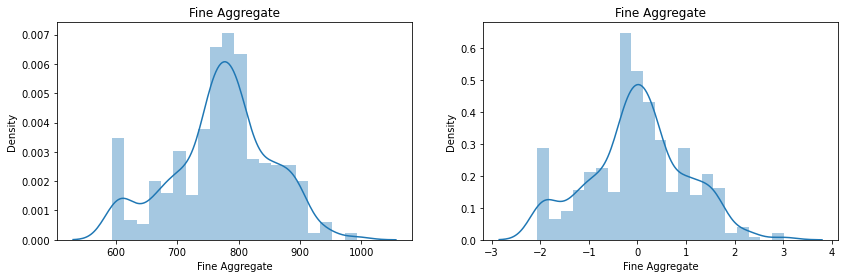

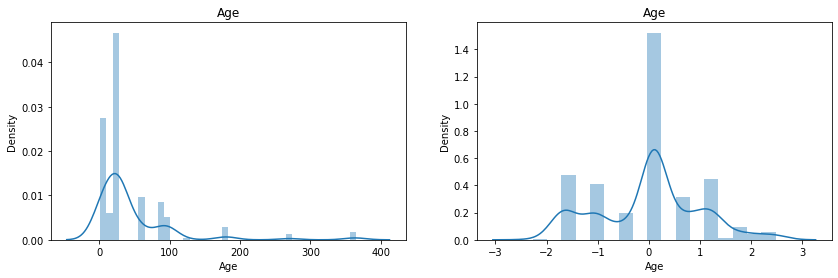

In [35]:
# Before and after comparision for Yeo-Johnson

for col in x_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(x_train_transformed2[col])
    plt.title(col)

    plt.show()